In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
#load KPMG dataset
df_1 = pd.read_csv('KPMG Data.xlsx - Transactions.csv')
df_1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,24/06/2017,True,Approved,OHM Cycles,Standard,high,medium,"2005,66","$1.203,40",37823.0
19996,19997,41,127,09/11/2017,True,Approved,Solex,Road,medium,medium,"416,98","$312,74",35560.0
19997,19998,87,2284,14/04/2017,True,Approved,OHM Cycles,Standard,medium,medium,"1636,9","$44,71",40410.0
19998,19999,6,2764,03/07/2017,False,Approved,OHM Cycles,Standard,high,medium,"227,88","$136,73",38216.0


In [3]:
#select only approved order
approved = df_1['order_status'] == 'Approved'
df = df_1[approved]
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,24/06/2017,True,Approved,OHM Cycles,Standard,high,medium,"2005,66","$1.203,40",37823.0
19996,19997,41,127,09/11/2017,True,Approved,Solex,Road,medium,medium,"416,98","$312,74",35560.0
19997,19998,87,2284,14/04/2017,True,Approved,OHM Cycles,Standard,medium,medium,"1636,9","$44,71",40410.0
19998,19999,6,2764,03/07/2017,False,Approved,OHM Cycles,Standard,high,medium,"227,88","$136,73",38216.0


In [4]:
#drop duplicates
df = df.drop_duplicates()
df = df.dropna(subset=['customer_id'])
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19821 non-null  int64  
 1   product_id               19821 non-null  int64  
 2   customer_id              19821 non-null  int64  
 3   transaction_date         19821 non-null  object 
 4   online_order             19467 non-null  object 
 5   order_status             19821 non-null  object 
 6   brand                    19625 non-null  object 
 7   product_line             19625 non-null  object 
 8   product_class            19625 non-null  object 
 9   product_size             19625 non-null  object 
 10  list_price               19821 non-null  object 
 11  standard_cost            19625 non-null  object 
 12  product_first_sold_date  19625 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.1+ MB


In [6]:
#get transaction month for df (create a func to get month from transaction_date)
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

df["transaction_date"] =  pd.to_datetime(df["transaction_date"], format="%d/%m/%Y")
# Create transaction_date column based on month and store in TransactionMonth
df['transaction_month'] = df['transaction_date'].apply(get_month) 
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0,2017-05-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0,2017-10-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0,2017-08-01
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0,2017-10-01


In [7]:
#create Cohort month per Rows
group = df.groupby('customer_id')['transaction_month']
# Finding the first transaction.
df['cohort_month'] = group.transform('min')

In [8]:
#create a func to return year, month, day

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `order_month` column
transcation_year, transaction_month, _ = get_date_int(df, 'transaction_month')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df, 'cohort_month')

In [9]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
# calculate the difference in months between order_month vs CohortMonth
df['cohort_index'] = years_diff * 12 + months_diff  + 1 

In [10]:
# Counting daily active user from each cohort
Customer_group = df.groupby(['cohort_month', 'cohort_index'])
# Counting number of unique customer_id in each group of CohortMonth and CohortIndex
cohort_data = Customer_group['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
 # Adding column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='cohort_month',
                                 columns ='cohort_index',
                                 values = 'customer_id')

In [11]:
#Setup cohort_sizes + retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [12]:
# Create retention index
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='cohort_month')

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 360

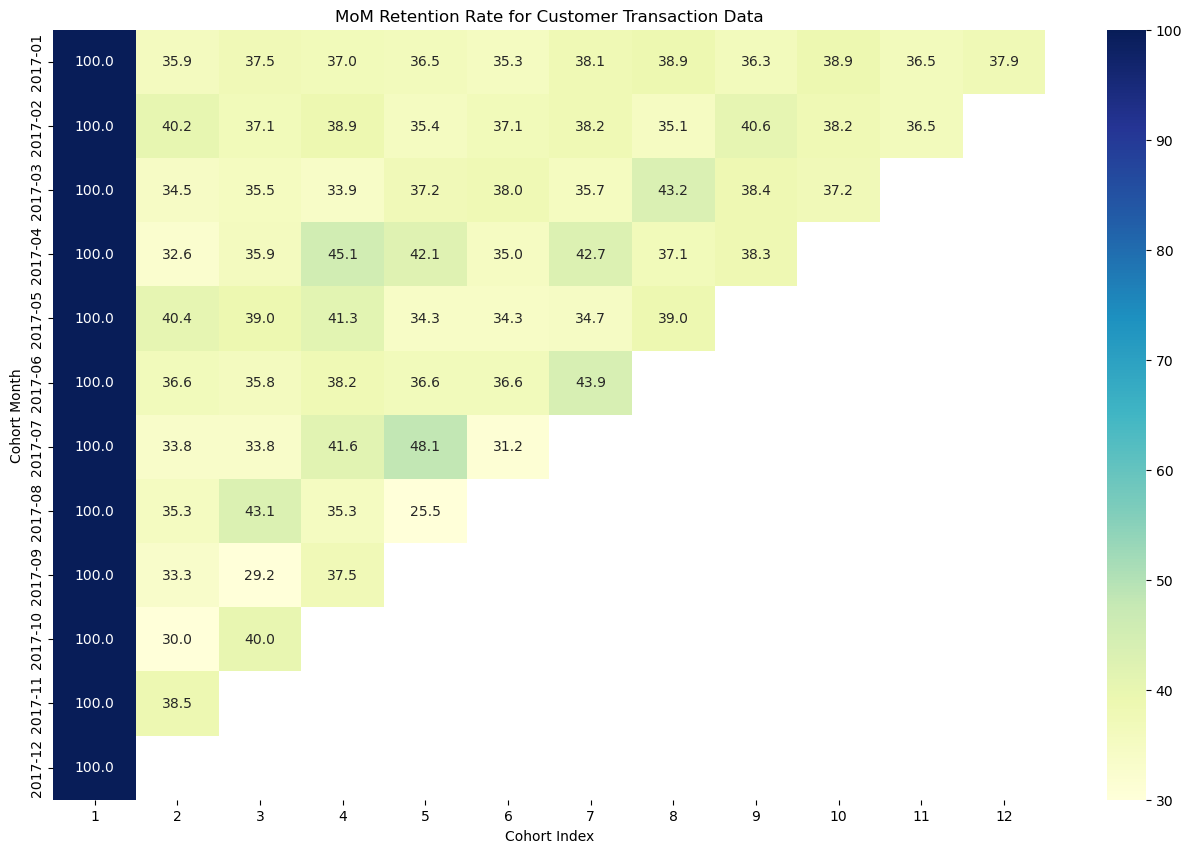

In [15]:
# Setup the figure size
plt.figure(figsize=(16, 10))

# Adding title for cohort chart
plt.title('MoM Retention Rate for Customer Transaction Data', fontsize = 12)

# Creating the cohort chart
sns.heatmap((retention*100).round(1), annot=True, fmt= '', cmap='YlGnBu', vmin = 30 , vmax = 100)

plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')

plt.show()